0.089401


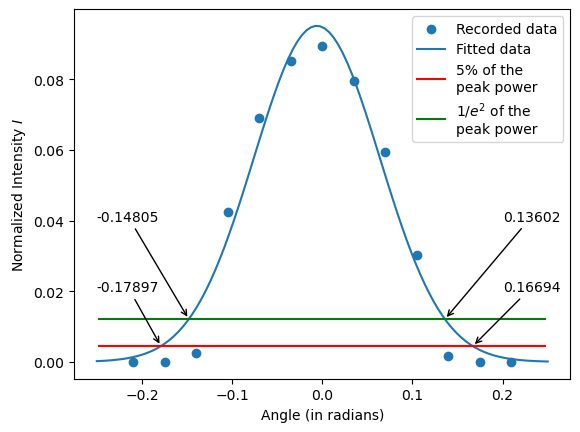

In [5]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("single-mode.txt")

def Gaussian(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))
x1 = data[:,0]
y1 = data[:,1]

popt, pcov = curve_fit(Gaussian, x1, y1, p0=[0.09, -0.006, -0.06])


fit_y = Gaussian(x1, *popt)

print(y1.max())
plt.scatter(x1,y1, label="Recorded data")
xnew = np.linspace(-0.25, 0.25, num=100)
y1_max = y1.max()
fivePer = 0.05*y1_max
plt.plot(xnew, Gaussian(xnew, *popt), label="Fitted data")
plt.axhline(y = fivePer, xmin = 0.05, xmax = 0.95, color = 'r', linestyle = '-', label="5% of the \npeak power")
plt.axhline(y = 0.0120991096566, xmin = 0.05, xmax = 0.95, color = 'g', linestyle = '-', label="$1/e^2$ of the \npeak power")
plt.xlabel('Angle (in radians)')
plt.ylabel('Normalized Intensity $I$')
plt.annotate("-0.17897", xy=(-0.17897, 0.00447), xytext=(-0.25, 0.02), arrowprops=dict(arrowstyle= '->'))
plt.annotate("0.16694", xy=(0.16694, 0.00447), xytext=(0.2, 0.02), arrowprops=dict(arrowstyle= '->'))
plt.annotate("-0.14805", xy=(-0.14805, 0.0121), xytext=(-0.25, 0.04), arrowprops=dict(arrowstyle= '->'))
plt.annotate("0.13602", xy=(0.13602, 0.0121), xytext=(0.2, 0.04), arrowprops=dict(arrowstyle= '->'))
plt.legend()
plt.savefig("singlemodeNA.png", dpi = 1200, bbox_inches='tight')
plt.show()

[8.48936297e+00 5.58831629e-04]


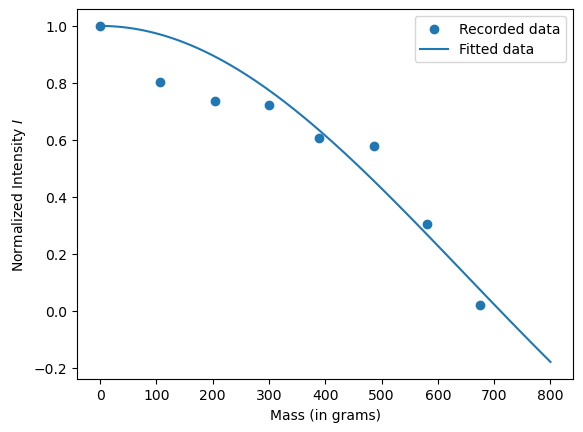

In [39]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("microbending.txt")

def microbend(x, c, a):
    return 1-c*(a*x/(1+(a*x)**2))**2

x1 = data[:,0]
y1 = data[:,1]

popt, pcov = curve_fit(microbend, x1, y1, p0=[8.4889, 0.00055])
print(popt)
fit_y = microbend(x1, *popt)
xnew = np.linspace(-1, 800, num=100)
plt.scatter(x1,y1, label="Recorded data")
plt.plot(xnew, microbend(xnew, *popt), label="Fitted data")
plt.xlabel('Mass (in grams)')
plt.ylabel('Normalized Intensity $I$')
plt.legend()
plt.savefig("microbending.png", dpi = 1200, bbox_inches='tight')
plt.show()

/tmp/ipykernel_27614/1529599102.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return 1187.3*np.exp(-10.3941*r)/r**0.5


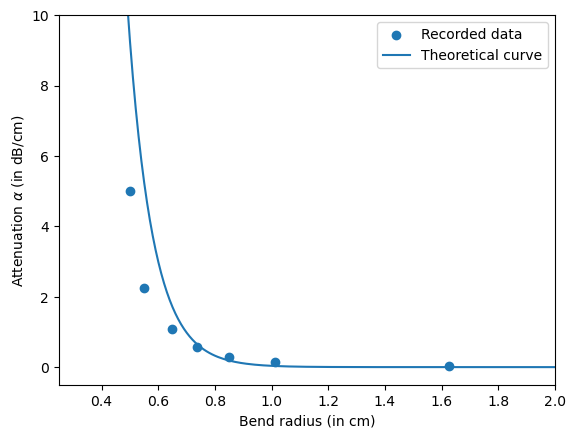

In [38]:
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("bendloss.txt")

def bendloss(r):
    return 1187.3*np.exp(-10.3941*r)/r**0.5

x1 = data[:,0]
y1 = data[:,1]


r1 = np.linspace(0, 10, 1000)
a1 = bendloss(r1)




#xnew = np.linspace(-1, 800, num=100)
plt.scatter(x1,y1, label="Recorded data")

plt.plot(r1, a1, label="Theoretical curve")
plt.ylim(-0.5, 10)
plt.xlim(0.25, 2)
plt.xlabel('Bend radius (in cm)')
plt.ylabel('Attenuation $\\alpha$ (in dB/cm)')
plt.legend()
plt.savefig("bendloss.png", dpi = 1200, bbox_inches='tight')
plt.show()